请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

# 保留区

In [ ]:
# 下载数据集并解压
!wget https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/test.zip 
!wget https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/train_preliminary.zip 
!unzip train_preliminary.zip -d /home/aistudio/datasets/ 

--2020-05-28 13:34:00--  https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/test.zip
Resolving tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com (tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com)... 58.217.230.63, 58.217.230.58, 58.217.230.57, ...
Connecting to tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com (tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com)|58.217.230.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226566169 (216M) [application/zip]
Saving to: ‘test.zip.3’

test.zip.3          100%[===================>] 216.07M  11.5MB/s    in 27s     

2020-05-28 13:34:27 (8.10 MB/s) - ‘test.zip.3’ saved [226566169/226566169]

--2020-05-28 13:34:28--  https://tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqcloud.com/cephfs/tesla_common/deeplearning/dataset/algo_contest/train_preliminary.zip
Resolving tesla-ap-shanghai-1256322946.cos.ap-shanghai.myqclou

变量名说明
all_ad,all_click,all_user
mini_ad,mini_click,mini_user

环境准备
gensim -> word2vec
pandas,numpy -> data
matplotlib -> view


In [ ]:
环境准备
!pip install gensim
!pip install matplotlib

In [ ]:
# 切分出调试用的小数据
import pandas as pd
import numpy as np

foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_csv(filename)

all_click = load_csv(foldername + "click_log.csv")
all_click.head()
print("max user_id         :",all_click.loc[:,"user_id"].max())
print("max creative_id     :",all_click.loc[:,"creative_id"].max())

limit_user_id = 9000
limit_create_id = 40000

mini_click = all_click.loc[(all_click.creative_id < limit_create_id) & (all_click.user_id < limit_user_id)]
mini_click.to_csv(foldername + "click_log_mini.csv",index=0)

all_user = load_csv(foldername + "user.csv")
mini_user = all_user.loc[all_user.user_id < limit_user_id]
mini_user.to_csv(foldername + "user_mini.csv")

all_ad = load_csv(foldername + "ad.csv")
print("max ad_id           :",all_ad.loc[:,"ad_id"].max())
print("max product_id      :",(all_ad[all_ad["product_id"]!="\\N"]).loc[:,"product_id"].max())
print("max product_category:",all_ad.loc[:,"product_category"].max())
print("max advertiser_id   :",all_ad.loc[:,"advertiser_id"].max())
print("max industry        :",(all_ad[all_ad["industry"]!="\\N"]).loc[:,"industry"].max())
mini_ad = all_ad.loc[all_ad.creative_id < limit_create_id]
mini_ad.to_csv(foldername + "ad_mini.csv")


max user_id         : 900000
max creative_id     : 4445718
max ad_id           : 3812200
max product_id      : 9999
max product_category: 18
max advertiser_id   : 62965
max industry        : 99


In [ ]:
# 每个数据文件describe,行数的统计
!wc -l "/home/aistudio/datasets/train_preliminary/click_log.csv"
!wc -l "/home/aistudio/datasets/train_preliminary/user.csv"
!wc -l "/home/aistudio/datasets/train_preliminary/ad.csv"

import pandas as pd
import numpy as np
from tqdm import tqdm
import random

foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_csv(filename)

all_click = load_csv(foldername + "click_log.csv")
all_user = load_csv(foldername + "user.csv")
all_ad = load_csv(foldername + "ad.csv")
# print(all_click.describe())
# print(all_user.describe())
# print(all_ad.describe())


30082772 /home/aistudio/datasets/train_preliminary/click_log.csv
900001 /home/aistudio/datasets/train_preliminary/user.csv
2481136 /home/aistudio/datasets/train_preliminary/ad.csv


In [ ]:
# 每个数据文件mini_describe

import pandas as pd
import numpy as np
from tqdm import tqdm
import random

foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_csv(filename)

mini_click = load_csv(foldername + "click_log_mini.csv")
mini_user = load_csv(foldername + "user_mini.csv")
mini_ad = load_csv(foldername + "ad_mini.csv")

In [ ]:
# 用户describe
all_user.describe().round(1)

,user_id,age,gender
count,900000.0,900000.0,900000.0
mean,450000.5,4.2,1.3
std,259807.8,2.0,0.5
min,1.0,1.0,1.0
25%,225000.8,3.0,1.0
50%,450000.5,4.0,1.0
75%,675000.2,6.0,2.0
max,900000.0,10.0,2.0


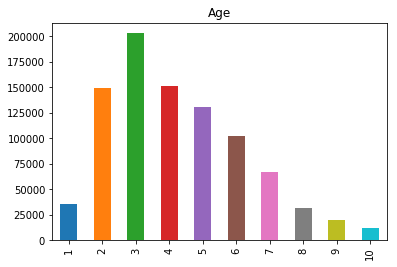

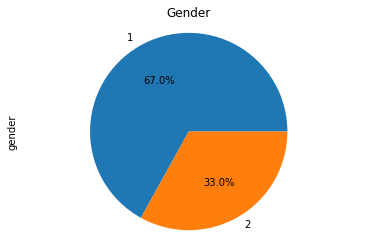

In [ ]:
## 统计不同年龄、性别的用户数量
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt


foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_csv(filename)

users = load_csv(foldername + "user.csv")
users_age = users['age'].value_counts().sort_index()
users_age.plot(kind='bar',title="Age")
plt.show()

users_gender = users['gender'].value_counts().sort_index()
users_gender.plot(kind='pie',autopct='%1.1f%%',title="Gender")
plt.axis('equal')
plt.show()

In [ ]:
# 广告describe
all_ad.describe().round(1)


,creative_id,ad_id,product_category,advertiser_id
count,2481135.0,2481135.0,2481135.0,2481135.0
mean,2192007.8,1888106.6,7.8,27416.2
std,1285497.2,1099763.5,6.8,15346.3
min,1.0,1.0,1.0,2.0
25%,1076369.5,939192.5,2.0,14974.0
50%,2191948.0,1889017.0,5.0,25197.0
75%,3304419.5,2839458.0,18.0,38254.0
max,4445718.0,3812200.0,18.0,62965.0


In [ ]:
# 点击行为
all_click.describe().round(1)

,time,user_id,creative_id,click_times
count,30082771.0,30082771.0,30082771.0,30082771.0
mean,48.0,449855.6,1676532.4,1.1
std,25.9,259993.9,1308053.6,0.3
min,1.0,1.0,1.0,1.0
25%,26.0,224613.0,415810.0,1.0
50%,49.0,449804.0,1508864.0,1.0
75%,71.0,675242.0,2740463.5,1.0
max,91.0,900000.0,4445718.0,152.0


In [ ]:
# 每个数据文件describe
!wc -l "/home/aistudio/datasets/test/click_log.csv"
!wc -l "/home/aistudio/datasets/test/ad.csv"

import pandas as pd
import numpy as np
from tqdm import tqdm
import random

foldername = "/home/aistudio/datasets/test/"
def load_csv(filename):
    return pd.read_csv(filename)

test_all_click = load_csv(foldername + "click_log.csv")
test_all_ad = load_csv(foldername + "ad.csv")
print(test_all_click.describe().round(1))
print(test_all_ad.describe().round(1))

33585513 /home/aistudio/datasets/test/click_log.csv
2618160 /home/aistudio/datasets/test/ad.csv
             time     user_id  creative_id  click_times
count  33585512.0  33585512.0   33585512.0   33585512.0
mean         48.0   3499713.9    1674632.1          1.1
std          25.9    288331.3    1308090.1          0.4
min           1.0   3000001.0          1.0          1.0
25%          26.0   3249486.0     415805.0          1.0
50%          49.0   3500907.0    1506880.0          1.0
75%          71.0   3748320.0    2737762.0          1.0
max          91.0   4000000.0    4445720.0        185.0
       creative_id      ad_id  product_category  advertiser_id
count    2618159.0  2618159.0         2618159.0      2618159.0
mean     2192127.4  1888152.1               7.8        27553.0
std      1285007.9  1099370.7               6.8        15360.2
min            1.0        1.0               1.0            1.0
25%      1077500.5   940042.5               2.0        15137.0
50%      2188608.0  18

# Test测试代码区

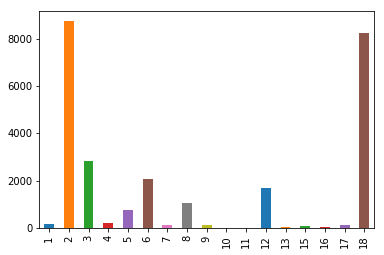

In [ ]:
# 统计商品种类，发现集中2，18
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_csv(filename)

ads = load_csv(foldername + "ad_mini.csv")
ads_industry = ads['product_category'].value_counts().sort_index()
ads_industry.plot(kind='bar')
plt.show()

In [ ]:
# 点击次数，需要洗掉过分的，感觉是2或者10或者21,
# user_id = 839368, 记录太多,一共16868
# click_times = 152, 点击次数最多
# 0.75 -> 40, 0.9 ->66, 0.95 ->89
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

foldername = "/home/aistudio/datasets/train_preliminary/"
def load_csv(filename):
    return pd.read_cs'click_times']
now_click = all_click
remove_click = now_click[(now_click['user_id']!=839368) & (now_click['clicclick = now_click
cut_click = remove_click.grlick["click_times"]
print(cut_click.size().a(cut_user.value_counts())


count    899999.0
mean         33.4
std          31.4
min           2.0
25%          15.0
50%          24.0
75%          40.0
max        1706.0
dtype: float64
89.0


In [ ]:
# 三张表的过滤器
# 输入 click_log.csv, user.csv, ad.csv
# 输出 click_log_fix.csv, user_fix.csv, ad_fix.csv
import os
import pandas as pd
import logging

foldername = "/home/aistudio/datasets/train_preliminary/"
clickname = "click_log.csv"
username = "user.csv"
adname = "ad.csv"
# clickname = "click_log_mini.csv"
# username = "user_mini.csv"
# adname = "ad_mini.csv"

def load_csv(filename):
    return pd.read_csv(filename)

def fix_click_csv(datas):
    datas = datas[(datas['user_id']!=839368) & (datas['click_times']!=152)]
    return datas

def fix_user_csv(datas):
    datas = datas[datas['user_id']!=839368]
    return datas

def fix_ad_csv(datas):
    datas['product_id'] = datas['product_id'].apply(lambda x : 0 if x == '\\N' else int(x))
    datas['industry'] = datas['industry'].apply(lambda x : 0 if x == '\\N' else int(x))
    return datas


if __name__ == '__main__':
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    if not os.path.exists(foldername + "fix_" + clickname):
        logging.info("fixing " + clickname)
        datas = load_csv(foldername + clickname)
        datas = fix_click_csv(datas)
        datas.to_csv(foldername + "fix_" + clickname)
        # print(datas.head(10))
        print(datas.describe().round(1),"\n")
        logging.info("Finish fixing " + clickname)

    if not os.path.exists(foldername + "fix_" + username):
        logging.info("fixing " + clickname)
        datas = load_csv(foldername + username)
        datas = fix_user_csv(datas)
        datas.to_csv(foldername + "fix_" + username)
        # print(datas.head(10))
        print(datas.describe().round(1),"\n")
        logging.info("Finish fixing " + clickname)

    if not os.path.exists(foldername + "fix_" + adname):
        logging.info("fixing " + clickname)
        datas = load_csv(foldername + adname)
        datas = fix_ad_csv(datas)
        datas.to_csv(foldername + "fix_" + adname)
        # print(datas.head(10))
        print(datas.describe().round(1),"\n")
        logging.info("Finish fixing " + clickname)

2020-06-02 19:29:36,780 : INFO : fixing click_log.csv
2020-06-02 19:32:13,213 : INFO : Finish fixing click_log.csv
2020-06-02 19:32:13,214 : INFO : fixing click_log.csv


             time     user_id  creative_id  click_times
count  30065902.0  30065902.0   30065902.0   30065902.0
mean         48.0    449637.0    1676791.2          1.1
std          25.9    259903.0    1308061.9          0.3
min           1.0         1.0          1.0          1.0
25%          26.0    224496.0     415810.0          1.0
50%          49.0    449544.0    1509313.0          1.0
75%          71.0    674890.0    2740833.0          1.0
max          91.0    900000.0    4445718.0         67.0 



2020-06-02 19:32:16,681 : INFO : Finish fixing click_log.csv
2020-06-02 19:32:16,682 : INFO : fixing click_log.csv


        user_id       age    gender
count  899999.0  899999.0  899999.0
mean   450000.1       4.2       1.3
std    259807.6       2.0       0.5
min         1.0       1.0       1.0
25%    225000.5       3.0       1.0
50%    450000.0       4.0       1.0
75%    674999.5       6.0       2.0
max    900000.0      10.0       2.0 



2020-06-02 19:32:36,254 : INFO : Finish fixing click_log.csv


       creative_id      ad_id  product_id  product_category  advertiser_id  \
count    2481135.0  2481135.0   2481135.0         2481135.0      2481135.0   
mean     2192007.8  1888106.6      4887.1               7.8        27416.2   
std      1285497.2  1099763.5      8995.7               6.8        15346.3   
min            1.0        1.0         0.0               1.0            2.0   
25%      1076369.5   939192.5         0.0               2.0        14974.0   
50%      2191948.0  1889017.0      1296.0               5.0        25197.0   
75%      3304419.5  2839458.0      3286.0              18.0        38254.0   
max      4445718.0  3812200.0     44313.0              18.0        62965.0   

        industry  
count  2481135.0  
mean       181.2  
std        120.8  
min          0.0  
25%         47.0  
50%        238.0  
75%        296.0  
max        335.0   



In [2]:
# 实现一个word2ve的模型, 利用click,user,ad三张表,user作为groupby,click作为序列,ad作为信息
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import logging
from collections import OrderedDict, defaultdict
from gensim.models import Word2Vec 

foldername = "/home/aistudio/datasets/train_preliminary/"
modelfoldername = "/home/aistudio/models/train/"
# clickname = "fix_click_log.csv"
# username = "fix_user.csv"
# adname = "fix_ad.csv"
clickname = "fix_click_log_mini.csv"
username = "fix_user_mini.csv"
adname = "fix_ad_mini.csv"

def load_csv(filename):
    return pd.read_csv(filename)

def transform_pandas2dict(datas):
    dict_datas = dict()
    for index, row in datas.iterrows():
        # print(row," ",type(row))
        dict_datas[int(row['creative_id'])] = row.to_dict()
    return dict_datas

def sequence_behavior_operate(datas, ads, columnname):
    # print("-"*10,"\n")
    seq = []
    datas = datas.sort_values("time") 
    for index, row in datas.iterrows():
        seq.append(str(ads[int(row['creative_id'])][columnname]))
    # print("-"*10)
    return seq


def get_click_seqs(clicks, ads, columnname):
    group_clicks = clicks.groupby(["user_id"])
    click_sequences = []
    for name, group in tqdm(list(group_clicks)):
        now_seq = sequence_behavior_operate(group, ads, columnname)
        click_sequences.append(now_seq)
    # print(click_sequences[:5])

if __name__ == '__main__':
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    seq_file_flag = True
    GeneraForce = True
    for columnname in ["creative_id", "ad_id"]:
        if not os.path.exist(foldername + "seqs_user_" + columnname + ".json"):
            seq_file_flag = False
    if (not seq_file_flag) or GeneraForce:
        logging.info("Generate sequence")
        logging.info("Loading " + adname)
        ads = load_csv(foldername + adname)
        logging.info("Trans ad dataframe to dict")
        ads = transform_pandas2dict(ads)
        # print(ads)
        logging.info("Loading " + clickname)
        clicks = load_csv(foldername + clickname)
        for columnname in ["creative_id", "ad_id"]:
            if os.path.exist(foldername + "seqs_user_" + columnname + ".json") and (not GeneraForce):
                continue
            logging.info("Get sequence" + columnname)
            seqs_list = get_click_seqs(clicks,ads,columnname)
            logging.info("Saving sequence" + columnname)
            with open(foldername + "seqs_user_" + columnname + ".json" ,"w") as f:
                json.dump(seqs_list,f)
    
    for columnname in ["creative_id", "ad_id"]: 
        click_seqs = json.load(open(foldername + "seqs_user_" + columnname + ".json","r"))
        model = Word2Vec(click_seqs, sg=1, size=300, window=5, min_count=3, negative=3, sample=0.001, hs=1, workers=4,iter=20) 
        model.save(modelfoldername + "seq_" + columnname + "_word2vec.model")


ModuleNotFoundError: No module named 'gensim'